# Credit Card Fraud Detection

### Problem statement:-


Business challenge of this capstone project is to detect potential frauds so that customers are not wrongly charged for items that they did not purchase. We know that credit card fraud has become more & more rampant in recent years. So there is a dire need to improve risk management level in an effective way. This can be achieved by building an accurate & easy credit card risk monitoring system. There are many Machine learning algorithms that can be used for this purpose. The main aim of this project is to build a user model that best identifies fraud cases.

This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms. 


## Steps:-
The project pipeline can be briefly summarized in the following four steps:
1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

In [15]:
# This was used while running the model in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1) Importing the libraries

In [16]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [17]:
pd.set_option('display.max_columns', 500)

# 2) Exploratory data analysis

## > Reading and understanding the data

In [18]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
df.shape

(284807, 31)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Handling missing values

#### Handling missing values in columns

In [22]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

### Checking the distribution of the classes

In [23]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [24]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [25]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

We can see that there is only 0.17% frauds. We will take care of the class imbalance later.

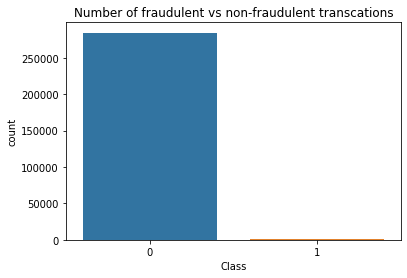

In [26]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

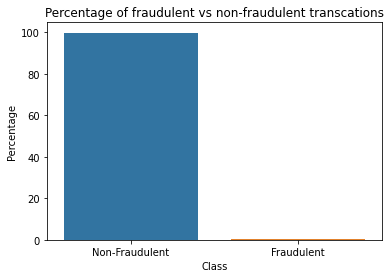

In [27]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

## Outliers treatment

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

### Observe the distribution of classes with time

In [28]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

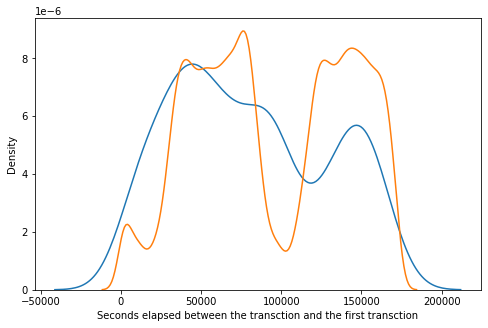

In [29]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

##### Analysis
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.
Hence, we can drop the `Time` column.

In [30]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### Observe the distribution of classes with amount

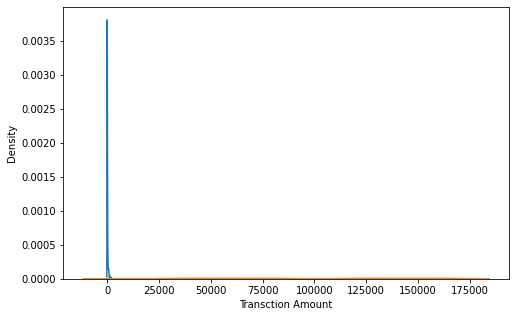

In [31]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

##### Analysis
We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount. 

## Train-Test Split

In [32]:
# Import library
from sklearn.model_selection import train_test_split

In [33]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [34]:
# Putting target variable to y
y = df['Class']

In [35]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Feature Scaling
We need to scale only the `Amount` column as all other columns are already scaled by the PCA transformation.

In [36]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [37]:
# Instantiate the Scaler
scaler = StandardScaler()

In [38]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [39]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,0.308648,0.875063,-0.009562,0.116038,0.086537,0.628337,-0.997868,0.482547,0.576077,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,0.519027,0.041275,-0.690783,0.647121,0.526333,-1.098558,0.511739,0.243984,3.349611,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,1.106534,1.026421,-0.474229,0.641488,-0.430684,-0.631257,0.634633,-0.718062,-0.039929,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,-0.784316,0.673626,1.428269,0.043937,-0.309507,-1.805728,-0.012118,0.377096,-0.658353,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,-0.497634,-0.445482,0.324575,0.125543,0.266588,0.802640,0.225312,-1.865494,0.621879,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [40]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,-0.850459,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,-0.338122,0.006032,0.477431,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,1.126976,-2.418093,1.250341,-0.056209,-0.736695,0.014783,1.890249,0.333755,-0.450398,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,1.145725,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.311988,-0.478635,0.231159,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,-1.705327,-0.127579,-0.207945,0.307878,0.213491,0.163032,-0.587029,-0.561292,0.472667,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,-0.288169,-1.007647,0.470316,-2.771902,0.221958,0.354333,2.603189,1.092576,0.668084,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


## Checking the Skewness

In [41]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

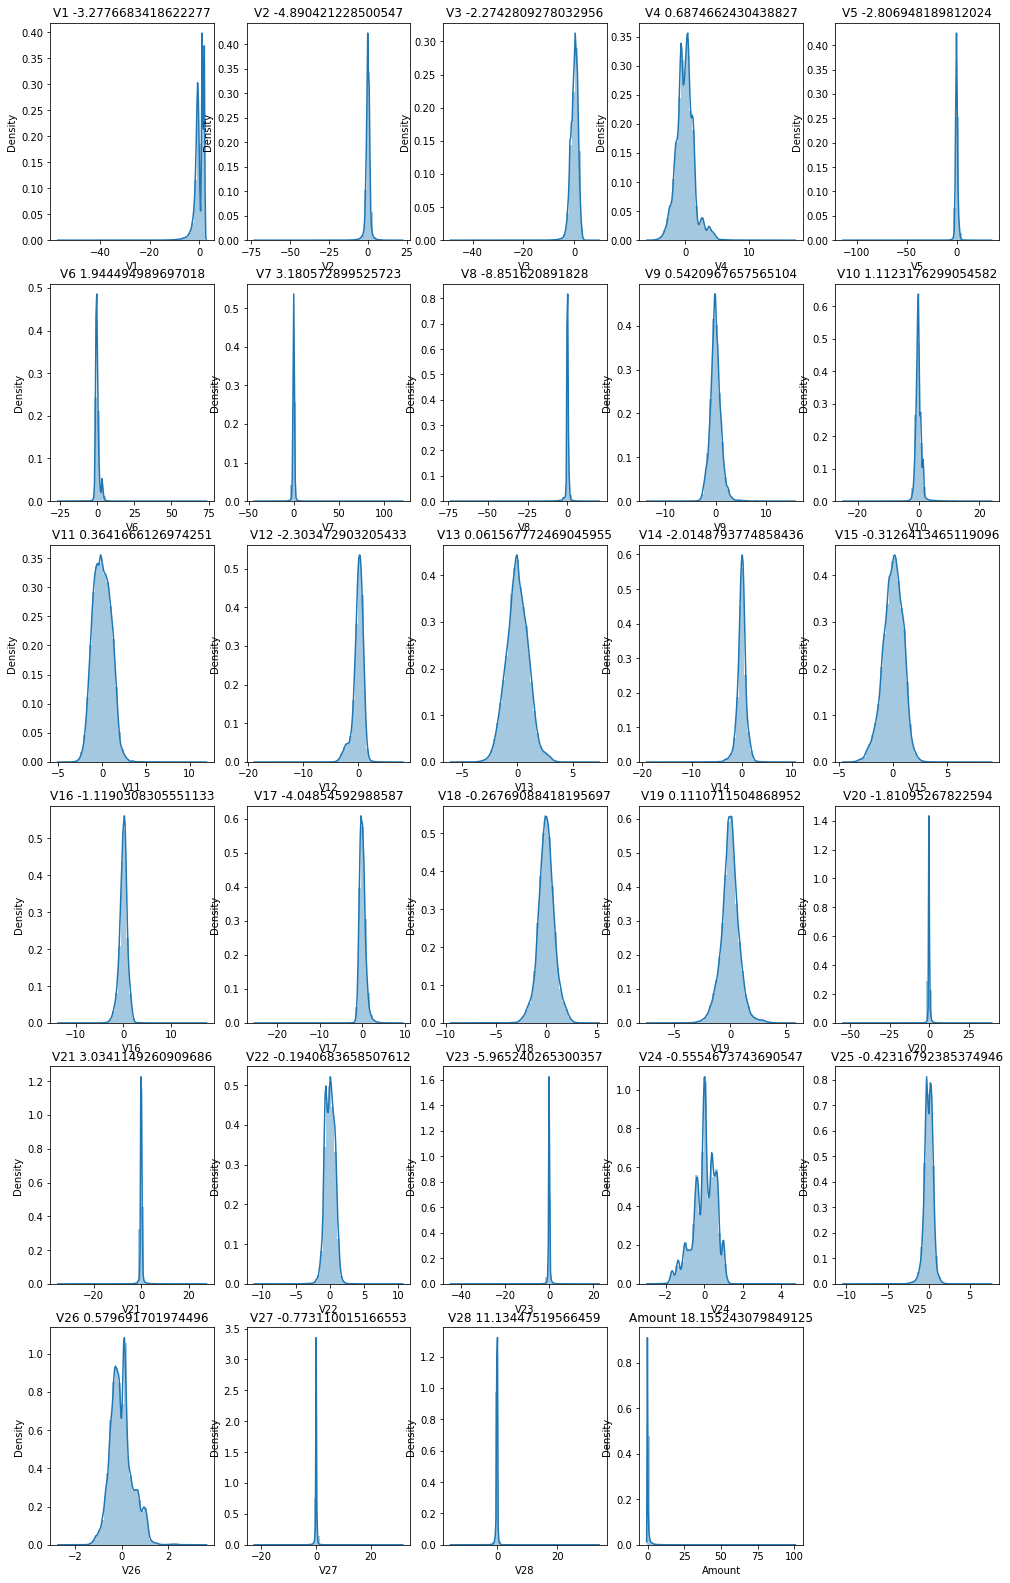

In [42]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

### Mitigate skweness with PowerTransformer

In [43]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [44]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

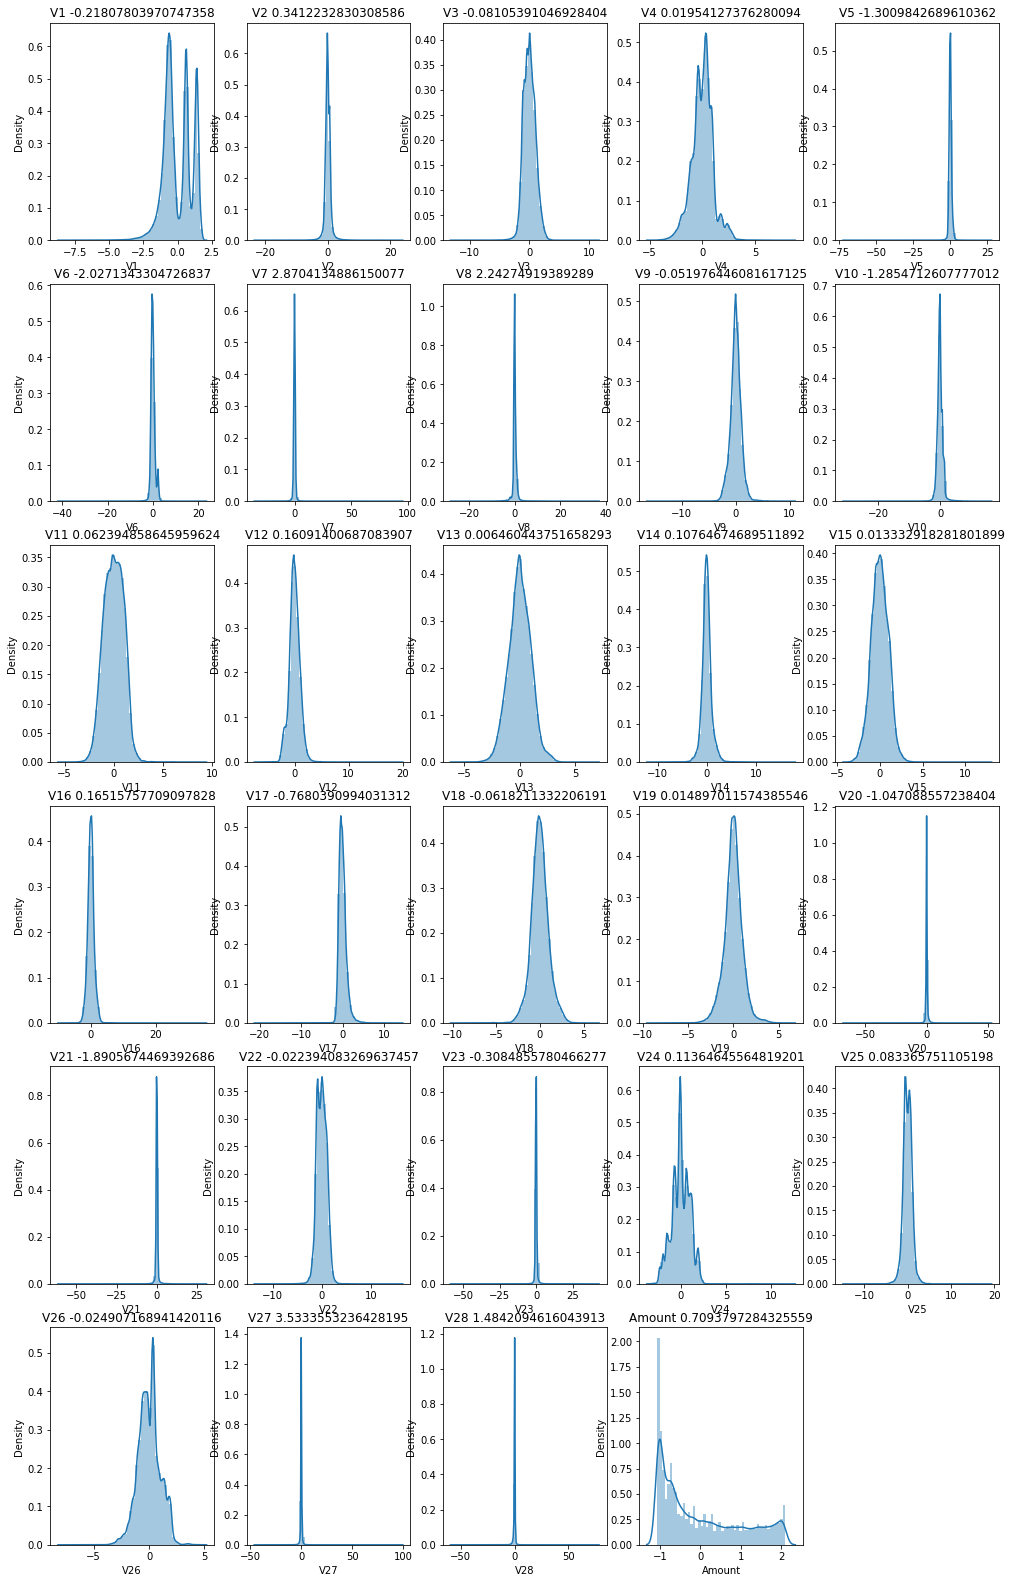

In [45]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Now we can see that all the variables are normally distributed after the transformation.

# 3) Model building on imbalanced data

### Metric selection for heavily imbalanced data
As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

Hence, we have to measure the ROC-AUC score for fair evaluation of the model. The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds. The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low. After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.

#### Why SVM was not tried for model building and Random Forest was not tried for few cases?
In the dataset we have 284807 datapoints and in the case of Oversampling we would have even more number of datapoints. SVM is not very efficient with large number of datapoints beacuse it takes lot of computational power and resources to make the transformation. When we perform the cross validation with K-Fold for hyperparameter tuning, it takes lot of computational resources and it is very time consuming. Hence, because of the unavailablity of the required resources and time SVM was not tried.

For the same reason Random forest was also not tried for model building in few of the hyperparameter tuning for oversampling technique.

#### Why KNN was not used for model building?
KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points. It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.




# MODEL 1 : LOGISTIC REGRESSION (IMBALANCED DATASET)

In [46]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [47]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#### Tuning hyperparameter  C
C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [48]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [49]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [50]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.843703,0.037587,0.025612,0.000528,0.01,{'C': 0.01},0.986856,0.987234,0.968390,0.982373,0.993743,0.983719,0.008479,1,0.984043,0.984587,0.988474,0.985596,0.983075,0.985155,0.001849
1,1.113786,0.066992,0.024872,0.000431,0.1,{'C': 0.1},0.986104,0.987144,0.960929,0.980620,0.992284,0.981416,0.010893,2,0.982402,0.983785,0.987917,0.984018,0.981187,0.983862,0.002270
2,1.164946,0.084220,0.025102,0.000452,1,{'C': 1},0.985834,0.986806,0.958452,0.979781,0.991548,0.980484,0.011635,3,0.981722,0.983322,0.987492,0.983305,0.980489,0.983266,0.002365
3,1.225464,0.075152,0.027167,0.004709,10,{'C': 10},0.985798,0.986754,0.958181,0.979674,0.991467,0.980375,0.011715,4,0.981632,0.983262,0.987435,0.983216,0.980404,0.983190,0.002375
4,1.205794,0.106341,0.024895,0.000587,100,{'C': 100},0.985793,0.986748,0.958155,0.979666,0.991461,0.980365,0.011722,5,0.981625,0.983256,0.987429,0.983207,0.980396,0.983182,0.002376
5,1.602603,0.859611,0.031759,0.011341,1000,{'C': 1000},0.985793,0.986747,0.958153,0.979663,0.991461,0.980363,0.011723,6,0.981623,0.983256,0.987428,0.983206,0.980395,0.983182,0.002376


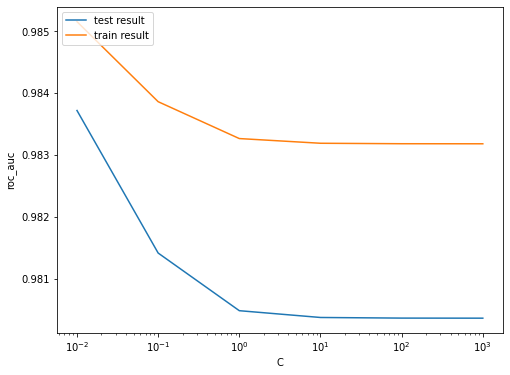

In [51]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [52]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9837192853831933 at C = 0.01


#### Logistic regression with optimal C

In [53]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [54]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

##### Prediction on the train set

In [55]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [56]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227427     22]
 [   135    261]]


In [57]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [58]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993109350655051
Sensitivity:- 0.6590909090909091
Specificity:- 0.9999032750198946
F1-Score:- 0.7687776141384388


In [59]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



##### ROC on the train set

In [60]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [61]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

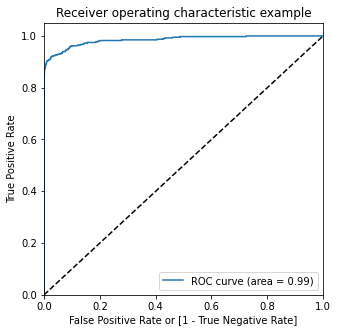

In [62]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

We acheived very good ROC 0.99 on the train set.

#### Prediction on the test set

In [63]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [64]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56850    16]
 [   42    54]]


In [65]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [66]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9989817773252344
Sensitivity:- 0.5625
Specificity:- 0.9997186367952731
F1-Score:- 0.6506024096385543


In [67]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



##### ROC on the test set

In [68]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

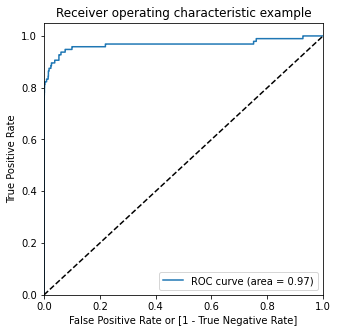

In [69]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see that we have very good ROC on the test set 0.97, which is almost close to 1.

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.70
    - Specificity = 0.99
    - F1-Score = 0.76
    - ROC = 0.99
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.77
    - Specificity = 0.99
    - F1-Score = 0.65
    - ROC = 0.97

Overall, the model is performing well in the test set, what it had learnt from the train set.




# MODEL 2 : XGBoost (IMBALANCED DATASET)

In [70]:
# Importing XGBoost
from xgboost import XGBClassifier

##### Tuning the hyperparameters

In [71]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [72]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,31.073787,0.416504,0.373266,0.004447,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.979854,0.971801,0.981423,0.977693,0.004215,1,0.999894,0.999940,0.999847,0.999894,0.000038
1,40.056413,0.955278,0.372762,0.012012,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.976568,0.972788,0.977688,0.975682,0.002096,3,0.999965,0.999987,0.999966,0.999973,0.000010
2,40.782981,0.505615,0.354109,0.008053,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978125,0.970882,0.980136,0.976381,0.003974,2,0.999950,0.999983,0.999911,0.999948,0.000029
3,28.746243,0.282366,0.365420,0.003046,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.968098,0.974481,0.973309,0.971963,0.002774,6,1.000000,1.000000,0.999995,0.999998,0.000002
4,38.329836,0.419545,0.366961,0.002102,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.968621,0.965527,0.982247,0.972132,0.007263,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,38.904226,0.321616,0.362109,0.004659,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.972799,0.973557,0.974113,0.973489,0.000539,4,1.000000,1.000000,1.000000,1.000000,0.000000


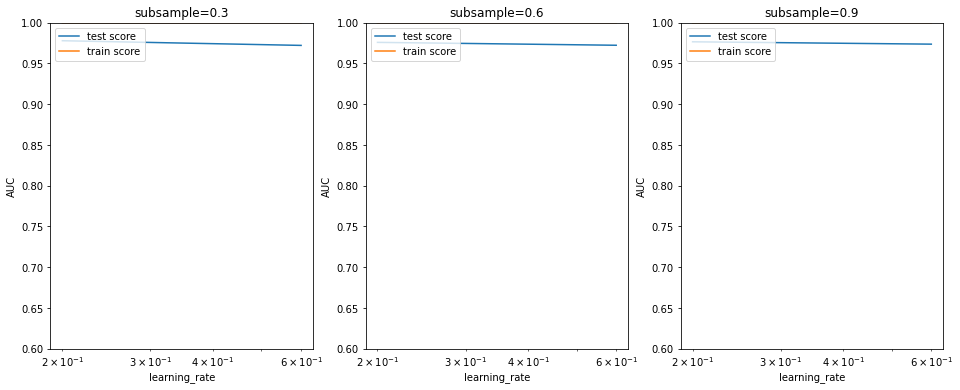

In [73]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [74]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [75]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

##### Prediction on the train set

In [76]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [77]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227436     13]
 [    59    337]]


In [78]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [79]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9996839956988304
Sensitivity:- 0.851010101010101
Specificity:- 0.9999428443299377
F1-Score:- 0.9034852546916889


In [80]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.96      0.85      0.90       396

    accuracy                           1.00    227845
   macro avg       0.98      0.93      0.95    227845
weighted avg       1.00      1.00      1.00    227845



In [81]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [82]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

0.997010146707991

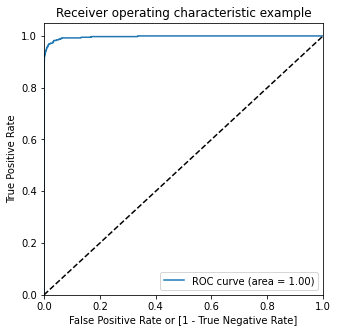

In [83]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

##### Prediction on the test set

In [84]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [85]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56852    14]
 [   23    73]]


In [86]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9993504441557529
Sensitivity:- 0.7604166666666666
Specificity:- 0.9997538071958639
F1-Score:- 0.7978142076502732


In [88]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.76      0.80        96

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [89]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [90]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9762384560487227

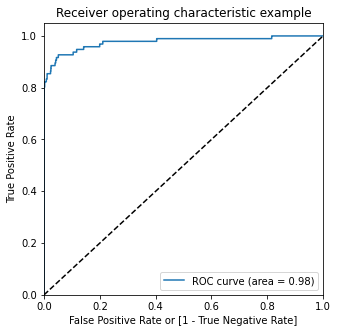

In [91]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.85
    - Specificity = 0.99
    - ROC-AUC = 0.99
    - F1-Score = 0.90
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.75
    - Specificity = 0.99
    - ROC-AUC = 0.98
    - F-Score = 0.79

Overall, the model is performing well in the test set, what it had learnt from the train set.




# MODEL 3  : DECISION TREE (IMBALANCED DATASET)

In [92]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [93]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [94]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.432838,0.015655,0.024346,0.000490,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923883,0.930134,0.004421,4
1,3.410282,0.015534,0.024457,0.000855,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933180,0.923869,0.930129,0.004427,5
2,3.374416,0.012477,0.023624,0.000159,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933279,0.936720,0.944598,0.938199,0.004738,2
3,3.361848,0.005151,0.024371,0.000716,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933297,0.936720,0.944598,0.938205,0.004732,1
4,6.694613,0.050659,0.025803,0.000849,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.932343,0.916477,0.938010,0.928943,0.009114,6
5,6.658692,0.031410,0.025728,0.000501,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924917,0.923884,0.930485,0.926429,0.002899,7
6,6.582470,0.015451,0.025598,0.000062,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933457,0.919691,0.944077,0.932409,0.009983,3
7,6.610234,0.033421,0.025912,0.000080,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933454,0.919672,0.921755,0.924960,0.006066,8


In [95]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9382050164508641
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100)


In [96]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

##### Prediction on the train set

In [97]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [98]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991704887094297
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7490039840637449


In [101]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [102]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [103]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9534547393930157

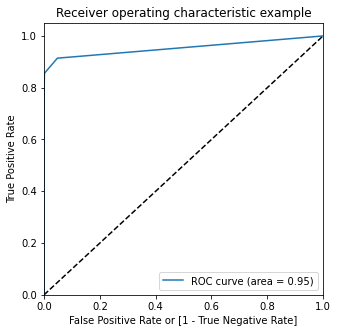

In [104]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)


##### Prediction on the test set

In [105]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [106]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56836    30]
 [   40    56]]


In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-Score:- 0.7490039840637449


In [109]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [110]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [111]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.92174979703748

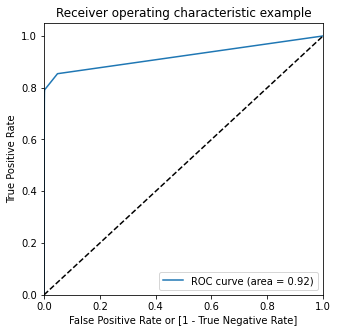

In [112]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - F1-Score = 0.75
    - ROC-AUC = 0.95
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.58
    - Specificity = 0.99
    - F-1 Score = 0.75
    - ROC-AUC = 0.92





# MODEL 4 : RANDOM FOREST (IMBALANCED DATASET)

In [113]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [114]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [115]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.999297768142558 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [116]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [117]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

##### Prediction on the train set

In [118]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [119]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993899361407975
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.8093278463648834


In [122]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.89      0.74      0.81       396

    accuracy                           1.00    227845
   macro avg       0.94      0.87      0.90    227845
weighted avg       1.00      1.00      1.00    227845



In [123]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [124]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9805022946424976

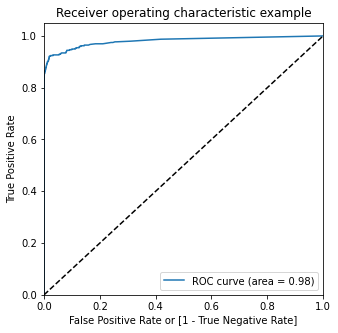

In [125]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

##### Prediction on the test set

In [126]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [127]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56843    23]
 [   35    61]]


In [128]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [129]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9989817773252344
Sensitivity:- 0.6354166666666666
Specificity:- 0.9995955403932051
F1-Score:- 0.8093278463648834


In [130]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.64      0.68        96

    accuracy                           1.00     56962
   macro avg       0.86      0.82      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [131]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [132]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9638900734475198

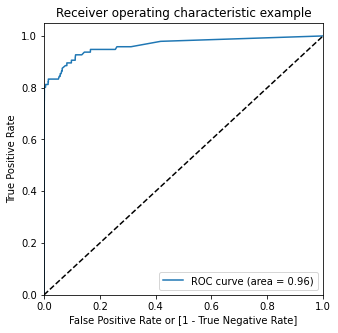

In [133]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - F1-Score = 0.80
    - ROC-AUC = 0.98
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.62
    - Specificity = 0.99
    - F-1 Score = 0.75
    - ROC-AUC = 0.96

### Choosing best model on the imbalanced data

We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, and Random Forest), almost all of them have performed well. More specifically Logistic regression and XGBoost performed best in terms of ROC-AUC score.

But as we have to choose one of them, we can go for the best as `XGBoost`, which gives us ROC score of 1.0 on the train data and 0.98 on the test data.

Keep in mind that XGBoost requires more resource utilization than Logistic model. Hence building XGBoost model is more costlier than the Logistic model. But XGBoost having ROC score 0.98, which is 0.01 more than the Logistic model. The 0.01 increase of score may convert into huge amount of saving for the bank.

#### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


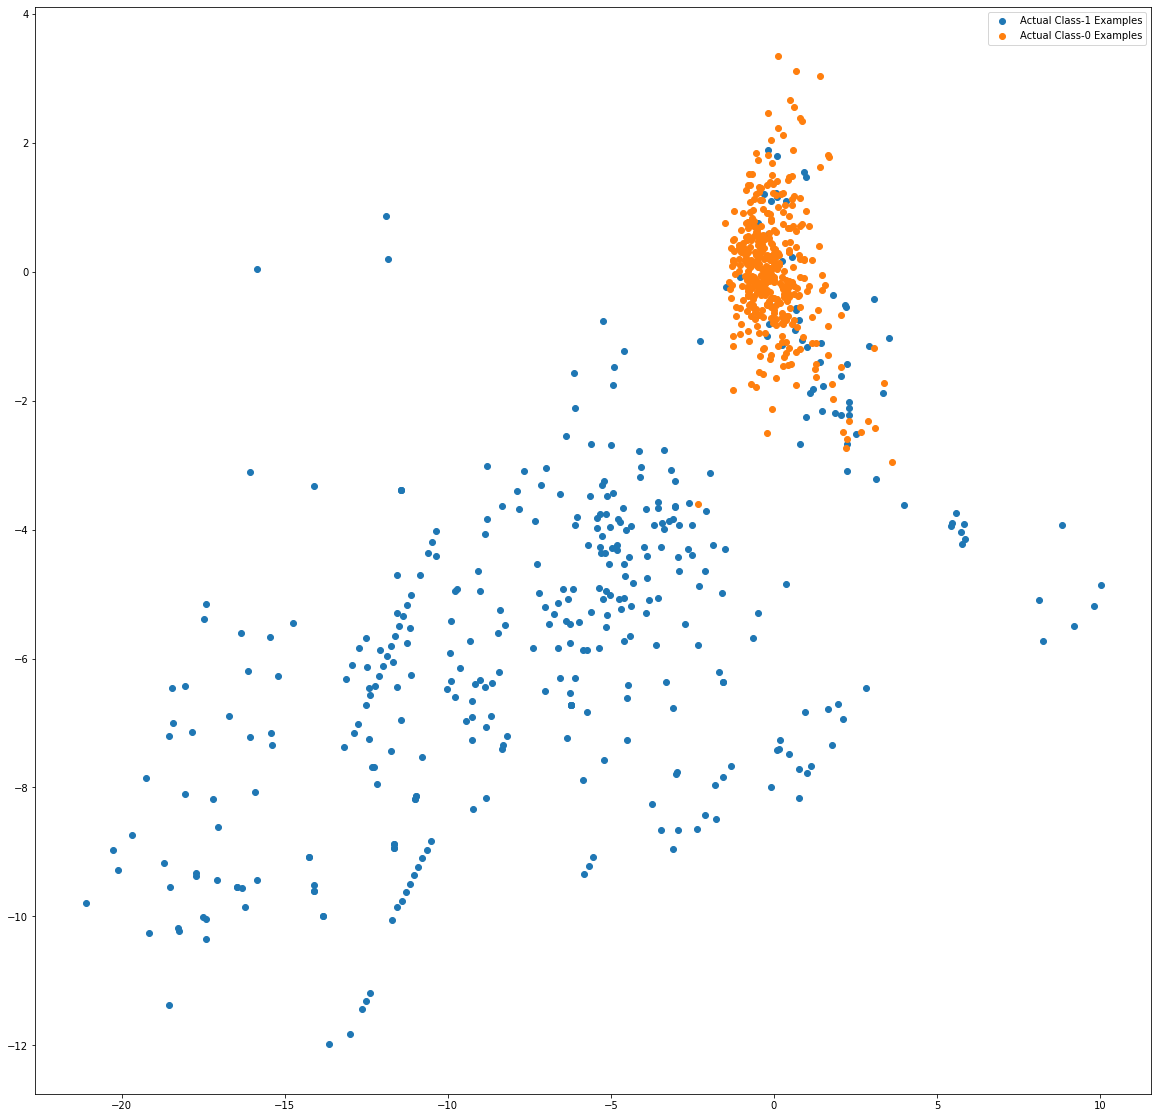

In [134]:
# Features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [135]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.997010146707991
Threshold= 0.001649919


We can see that the threshold is 0.85, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

# Handling data imbalance
As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.

- Undersampling :- Here for balancing the class distribution, the non-fraudulent transctions count will be reduced to 396 (similar count of fraudulent transctions)
- Oversampling :- Here we will make the same count of non-fraudulent transctions as fraudulent transctions.
- SMOTE :- Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data. 
- Adasyn:- This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

# UNDERSAMPLING THE DATASET

In [136]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [137]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [138]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 396, 1: 396})


# MODEL 5 -: Logistic Regression on balanced data with Undersampling

In [139]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [140]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008486,0.001554,0.003005,0.000213,0.01,{'C': 0.01},0.984897,0.991611,0.981571,0.971781,0.983562,0.982684,0.006410,1,0.988017,0.987801,0.989551,0.989909,0.988164,0.988688,0.000866
1,0.010378,0.002035,0.004098,0.002421,0.1,{'C': 0.1},0.984420,0.988129,0.980769,0.966651,0.983723,0.980738,0.007424,2,0.989745,0.989737,0.990795,0.991650,0.989408,0.990267,0.000835
2,0.014067,0.002890,0.002844,0.000108,1,{'C': 1},0.980286,0.987179,0.978526,0.961360,0.983723,0.978215,0.008935,3,0.990503,0.991065,0.991402,0.992268,0.989995,0.991047,0.000777
3,0.015739,0.001891,0.002811,0.000034,10,{'C': 10},0.975358,0.987021,0.978526,0.961680,0.983723,0.977262,0.008775,4,0.991592,0.991904,0.991302,0.992566,0.990145,0.991502,0.000798
4,0.018919,0.001594,0.002859,0.000089,100,{'C': 100},0.973450,0.986705,0.976282,0.960879,0.983723,0.976208,0.009047,5,0.991812,0.992044,0.991283,0.992656,0.990184,0.991596,0.000832
5,0.019214,0.000906,0.002906,0.000139,1000,{'C': 1000},0.973450,0.986705,0.975801,0.960879,0.983884,0.976144,0.009076,6,0.991782,0.992083,0.991292,0.992656,0.990184,0.991600,0.000834


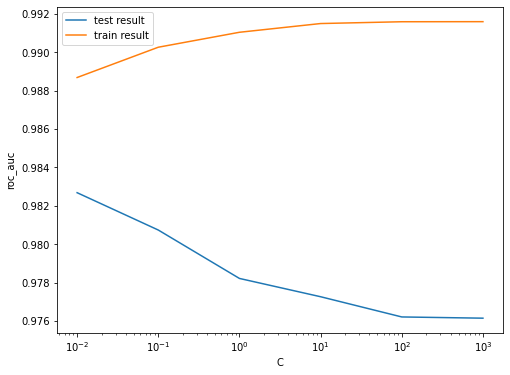

In [141]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [142]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.982684278505413 at C = 0.01


#### Logistic regression with optimal C

In [143]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)

In [144]:
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

##### Prediction on the train set

In [145]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [146]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[393   3]
 [ 30 366]]


In [147]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9583333333333334
Sensitivity:- 0.9242424242424242
Specificity:- 0.9924242424242424
F1-Score:- 0.9568627450980391


In [149]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       396
           1       0.99      0.92      0.96       396

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



In [150]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [151]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.989293184368942

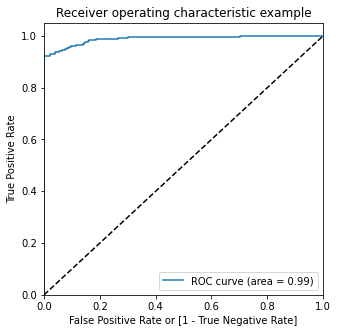

In [152]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Prediction on the test set

In [153]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

In [154]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55454  1412]
 [   13    83]]


In [155]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [156]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9749833222148099
Sensitivity:- 0.8645833333333334
Specificity:- 0.975169697182851


In [157]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.86      0.10        96

    accuracy                           0.97     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [158]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [159]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9632471145617182

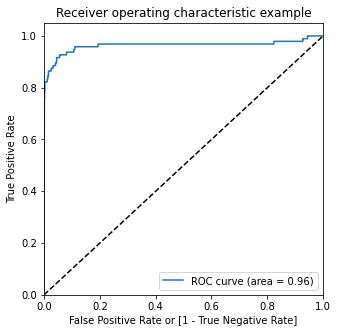

In [160]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.98
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.86
    - Specificity = 0.97
    - ROC = 0.96

# MODEL 6 -: XGBoost on balanced data with Undersampling

In [161]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_rus, y_train_rus)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [162]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.091720,0.002788,0.002782,0.000174,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.972624,0.974116,0.977904,0.974881,0.002222,5,1.0,1.0,1.0,1.0,0.0
1,0.114569,0.005503,0.003025,0.000047,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.982036,0.971361,0.982495,0.978631,0.005144,2,1.0,1.0,1.0,1.0,0.0
2,0.113851,0.002154,0.004942,0.002817,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.982036,0.971419,0.982495,0.978650,0.005117,1,1.0,1.0,1.0,1.0,0.0
3,0.076801,0.001211,0.002317,0.000006,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.964245,0.968262,0.979224,0.970577,0.006331,6,1.0,1.0,1.0,1.0,0.0
4,0.090978,0.001900,0.002552,0.000127,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.982668,0.967172,0.980028,0.976622,0.006769,4,1.0,1.0,1.0,1.0,0.0
5,0.089691,0.001693,0.002474,0.000014,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.982266,0.971820,0.978363,0.977483,0.004309,3,1.0,1.0,1.0,1.0,0.0


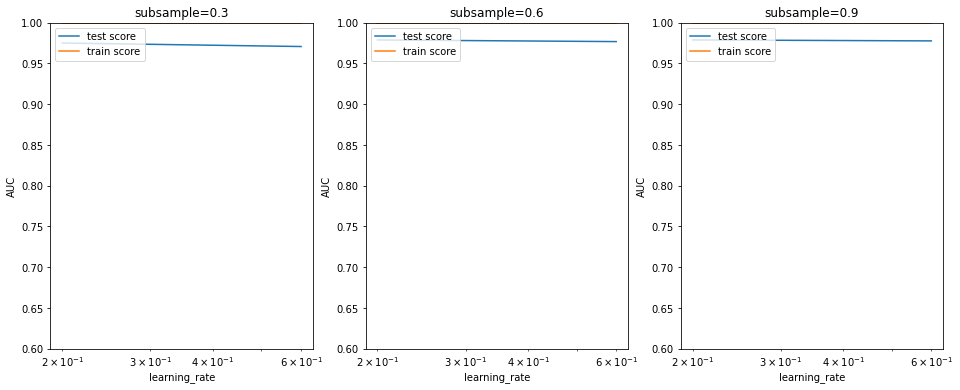

In [163]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [164]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [165]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6})

##### Prediction on the train set

In [166]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [167]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)

[[396   0]
 [  0 396]]


In [168]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [169]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9987373737373737
Sensitivity:- 1.0
Specificity:- 1.0


In [170]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       396

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792



In [171]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [172]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9999808692990512

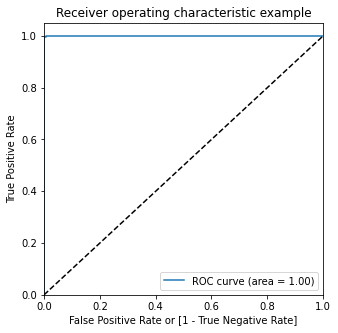

In [173]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

##### Prediction on the test set

In [174]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

In [175]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55271  1595]
 [   12    84]]


In [176]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [177]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9717882096836488
Sensitivity:- 0.875
Specificity:- 0.971951605528787


In [178]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.05      0.88      0.09        96

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [179]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [180]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9813289135863257

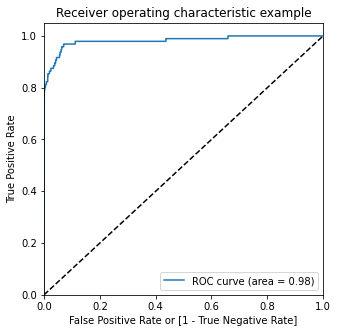

In [181]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 1.0
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.96
    - Sensitivity = 0.92
    - Specificity = 0.96
    - ROC-AUC = 0.98

# MODEL 7 -: Decision Tree on balanced data with Undersampling

In [182]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [183]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006473,0.001569,0.002159,0.000024,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.952910,0.962494,0.962494,0.959299,0.004518,2
1,0.005342,0.000256,0.002200,0.000273,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.952451,0.965966,0.962925,0.960447,0.005789,1
2,0.004039,0.000146,0.002041,0.000070,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.946855,0.934573,0.960715,0.947381,0.010679,6
3,0.004063,0.000146,0.002086,0.000083,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.947314,0.934573,0.961576,0.947821,0.011030,5
4,0.005259,0.000149,0.002172,0.000280,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.952795,0.961404,0.962925,0.959041,0.004460,3
5,0.005276,0.000233,0.001998,0.000026,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.952795,0.959424,0.962494,0.958238,0.004048,4
6,0.004038,0.000094,0.001978,0.000027,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.946740,0.934573,0.957157,0.946157,0.009229,8
7,0.004027,0.000092,0.002049,0.000056,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.943727,0.934573,0.961576,0.946625,0.011213,7


In [184]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9604472757881849
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)


In [185]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [186]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

In [187]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[386  10]
 [ 47 349]]


In [188]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [189]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.928030303030303
Sensitivity:- 0.8813131313131313
Specificity:- 0.9747474747474747


In [190]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       396
           1       0.97      0.88      0.92       396

    accuracy                           0.93       792
   macro avg       0.93      0.93      0.93       792
weighted avg       0.93      0.93      0.93       792



In [191]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [192]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9777382409958167

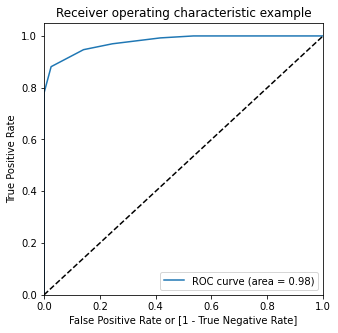

In [193]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

##### Prediction on the test set

In [194]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

In [195]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55120  1746]
 [   16    80]]


In [196]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [197]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9690670973631543
Sensitivity:- 0.8333333333333334
Specificity:- 0.9692962402841768


In [198]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.83      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.90      0.53     56962
weighted avg       1.00      0.97      0.98     56962



In [199]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

In [200]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.967876052181151

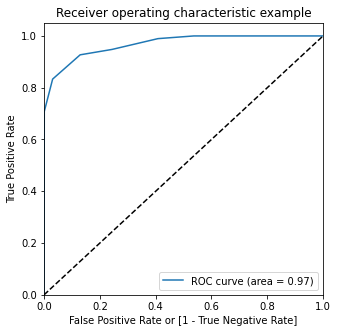

In [201]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.93
    - Sensitivity = 0.88
    - Specificity = 0.97
    - ROC-AUC = 0.98
- Test set
    - Accuracy = 0.96
    - Sensitivity = 0.85
    - Specificity = 0.96
    - ROC-AUC = 0.96

# MODEL 8 -: Random forest on balanced data with Undersampling

In [202]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_rus, y_train_rus)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [203]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc-auc of 0.9739057239057238 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}


In [204]:
# model with the best hyperparameters

rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)

In [205]:
# Fit the model
rfc_bal_rus_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

##### Prediction on the train set

In [206]:
# Predictions on the train set
y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

In [207]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[394   2]
 [ 44 352]]


In [208]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [209]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9419191919191919
Sensitivity:- 0.8888888888888888
Specificity:- 0.9949494949494949
F1-Score:- 0.9386666666666666


In [210]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       396
           1       0.99      0.89      0.94       396

    accuracy                           0.94       792
   macro avg       0.95      0.94      0.94       792
weighted avg       0.95      0.94      0.94       792



In [211]:
# Predicted probability
y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [212]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.983898326701357

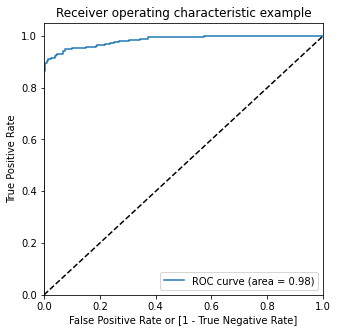

In [213]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

##### Prediction on the test set

In [214]:
# Predictions on the test set
y_test_pred = rfc_bal_rus_model.predict(X_test)

In [215]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56101   765]
 [   19    77]]


In [216]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [217]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9862364383273059
Sensitivity:- 0.8020833333333334
Specificity:- 0.986547321773995


In [218]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.09      0.80      0.16        96

    accuracy                           0.99     56962
   macro avg       0.55      0.89      0.58     56962
weighted avg       1.00      0.99      0.99     56962



In [219]:
# Predicted probability
y_test_pred_proba = rfc_bal_rus_model.predict_proba(X_test)[:,1]

In [220]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.972502058933868

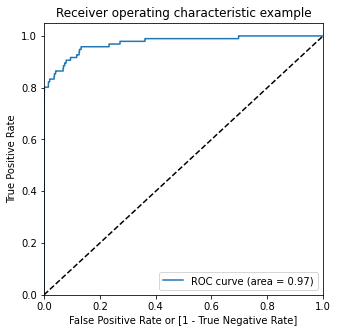

In [221]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.94
    - Sensitivity = 0.89
    - Specificity = 0.98
    - ROC-AUC = 0.98
- Test set
    - Accuracy = 0.98
    - Sensitivity = 0.83
    - Specificity = 0.98
    - ROC-AUC = 0.97

# OVERSAMPLING THE DATASET

In [222]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [223]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [224]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


# MODEL 9 -: Logistic Regression on balanced data with Oversampling

In [225]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [226]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.114881,0.038584,0.044671,0.003384,0.01,{'C': 0.01},0.988900,0.989012,0.988305,0.988323,0.988828,0.988674,0.000299,6,0.988707,0.988560,0.988728,0.988862,0.988621,0.988696,0.000103
1,2.217575,0.047663,0.043599,0.000699,0.1,{'C': 0.1},0.988924,0.989034,0.988301,0.988323,0.988846,0.988686,0.000311,5,0.988721,0.988569,0.988733,0.988869,0.988629,0.988704,0.000102
2,2.227731,0.033539,0.042523,0.000364,1,{'C': 1},0.988925,0.989035,0.988301,0.988322,0.988848,0.988686,0.000312,2,0.988720,0.988570,0.988732,0.988869,0.988629,0.988704,0.000102
3,2.231121,0.038686,0.044715,0.002927,10,{'C': 10},0.988925,0.989035,0.988301,0.988322,0.988849,0.988686,0.000312,1,0.988721,0.988570,0.988732,0.988869,0.988629,0.988704,0.000102
4,2.218668,0.031628,0.047290,0.008663,100,{'C': 100},0.988925,0.989035,0.988301,0.988321,0.988849,0.988686,0.000312,4,0.988721,0.988570,0.988732,0.988869,0.988629,0.988704,0.000102
5,2.215723,0.024109,0.044836,0.004380,1000,{'C': 1000},0.988925,0.989035,0.988301,0.988321,0.988849,0.988686,0.000312,3,0.988721,0.988570,0.988732,0.988869,0.988629,0.988704,0.000102


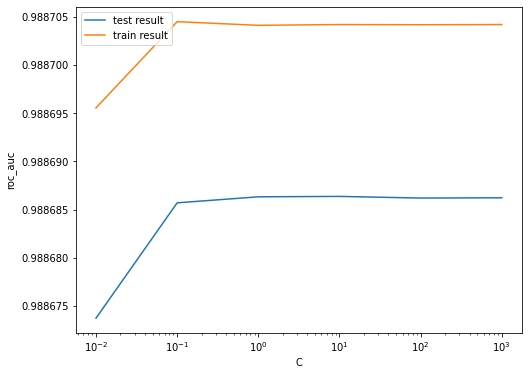

In [227]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [228]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9886863723797393 at C = 10


#### Logistic regression with optimal C

In [229]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.1)

In [230]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

##### Prediction on the train set

In [231]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [232]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[222289   5160]
 [ 17054 210395]]


In [233]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [234]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9511670748167721
Sensitivity:- 0.9250205540582724
Specificity:- 0.9773135955752719
F1-Score:- 0.9498559832416863


In [235]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.93      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [236]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [237]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9886993086989775

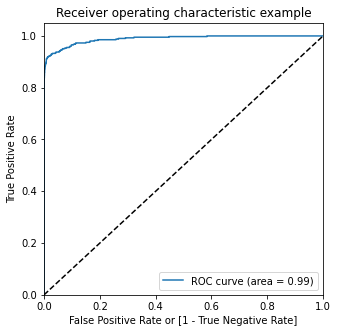

In [238]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Prediction on the test set

In [239]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

In [240]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55534  1332]
 [   11    85]]


In [241]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [242]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9764228784101682
Sensitivity:- 0.8854166666666666
Specificity:- 0.9765765132064854


In [243]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [244]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

In [245]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9716832480451119

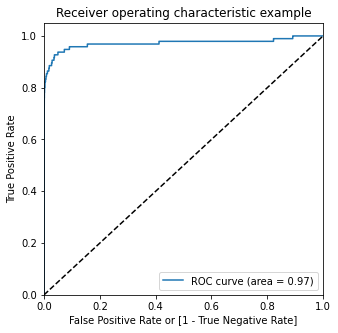

In [246]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.97
    - ROC = 0.98
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.89
    - Specificity = 0.97
    - ROC = 0.97

# MODEL 10 -: XGBoost on balanced data with Oversampling

In [247]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [248]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,55.264044,0.118931,0.688938,0.017184,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999918,0.999927,0.999915,0.999920,0.000005,4,0.999931,0.999931,0.999931,0.999931,2.532804e-08
1,66.262042,0.588982,0.692048,0.006692,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999908,0.999925,0.999913,0.999915,0.000007,5,0.999926,0.999921,0.999931,0.999926,3.979912e-06
2,65.552509,0.272170,0.684905,0.007166,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999910,0.999927,0.999908,0.999915,0.000008,6,0.999924,0.999931,0.999926,0.999927,2.635570e-06
3,55.431178,0.583655,0.698665,0.006162,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999987,0.999981,0.999975,0.999981,0.000005,3,0.999998,0.999998,1.000000,0.999999,7.262154e-07
4,65.776369,0.157613,0.702171,0.005636,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999995,0.999994,0.999980,0.999990,0.000007,1,1.000000,1.000000,0.999999,1.000000,2.350690e-07
5,65.798138,0.525444,0.700310,0.007962,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999997,0.999984,0.999965,0.999982,0.000013,2,0.999999,0.999998,0.999998,0.999998,5.415307e-07


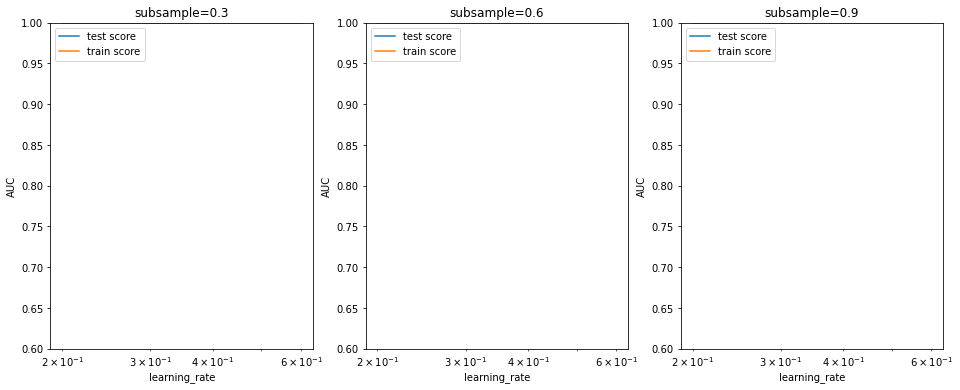

In [249]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [250]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [251]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

##### Prediction on the train set

In [252]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [253]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)

[[227449      0]
 [     0 227449]]


In [254]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [255]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9967377302164441
Sensitivity:- 1.0
Specificity:- 1.0


In [256]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [257]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [258]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9997707983668108

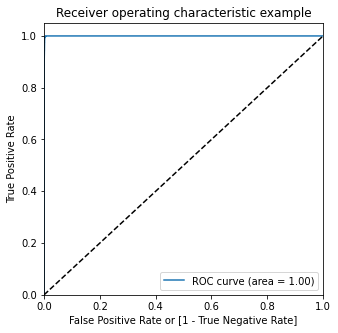

In [259]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### Prediction on the test set

In [260]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

In [261]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56587   279]
 [   18    78]]


In [262]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [263]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9947859976826656
Sensitivity:- 0.8125
Specificity:- 0.9950937291175747


In [264]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.22      0.81      0.34        96

    accuracy                           0.99     56962
   macro avg       0.61      0.90      0.67     56962
weighted avg       1.00      0.99      1.00     56962



In [265]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

In [266]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9717837218197165

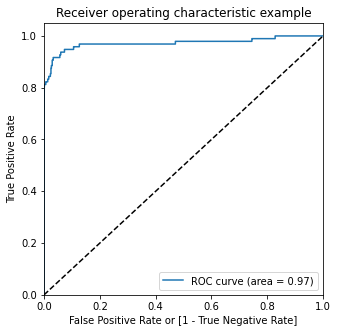

In [267]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 1.0
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.80
    - Specificity = 0.99
    - ROC-AUC = 0.97

# MODEL 11 -: Decision Tree on balanced data with Oversampling 

In [268]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [269]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.082375,0.045763,0.052071,0.001978,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990459,0.990671,0.990519,0.990550,0.000089,5
1,4.072758,0.036704,0.050934,0.000841,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990457,0.990674,0.990494,0.990542,0.000095,6
2,4.007954,0.019366,0.050723,0.000591,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990441,0.990585,0.990424,0.990484,0.000072,8
3,4.035448,0.020674,0.050648,0.000100,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990446,0.990596,0.990424,0.990489,0.000076,7
4,6.178669,0.021193,0.051536,0.001111,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999564,0.999659,0.999511,0.999578,0.000061,1
5,6.231209,0.039705,0.051457,0.001475,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999574,0.999628,0.999487,0.999563,0.000058,3
6,6.205978,0.017126,0.050959,0.000473,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999471,0.999683,0.999507,0.999554,0.000092,4
7,6.212714,0.028373,0.051267,0.000370,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999505,0.999684,0.999520,0.999570,0.000081,2


In [270]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9995781298264751
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [271]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [272]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

In [273]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[225948   1501]
 [     0 227449]]


In [274]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [275]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9967003592014034
Sensitivity:- 1.0
Specificity:- 0.9934007184028067


In [276]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [277]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [278]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9997758458077042

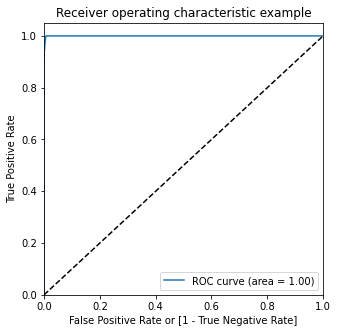

In [279]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### Prediction on the test set

In [280]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

In [281]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56453   413]
 [   20    76]]


In [282]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [283]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9923984410659739
Sensitivity:- 0.7916666666666666
Specificity:- 0.9927373122779869


In [284]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.16      0.79      0.26        96

    accuracy                           0.99     56962
   macro avg       0.58      0.89      0.63     56962
weighted avg       1.00      0.99      0.99     56962



In [285]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [286]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8948688034150458

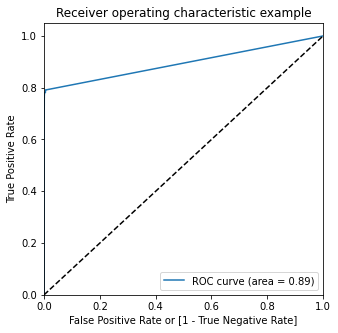

In [287]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.79
    - Specificity = 0.99
    - ROC-AUC = 0.90

# SMOTE (Synthetic Minority Oversampling Technique) ON DATASET

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [288]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [291]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote =sm.fit_resample(X_train, y_train)

In [292]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


# MODEL 12 : Logistic Regression on balanced data with SMOTE 

In [293]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [294]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.134712,0.196919,0.045214,0.000527,0.01,{'C': 0.01},0.989805,0.989796,0.989484,0.989631,0.989910,0.989725,0.000150,6,0.989758,0.989666,0.989760,0.989841,0.989682,0.989741,0.000063
1,2.055163,0.096992,0.045714,0.000875,0.1,{'C': 0.1},0.989834,0.989807,0.989488,0.989632,0.989942,0.989741,0.000161,1,0.989780,0.989686,0.989772,0.989853,0.989700,0.989758,0.000060
2,2.125087,0.062809,0.045652,0.000826,1,{'C': 1},0.989836,0.989807,0.989486,0.989630,0.989944,0.989741,0.000162,2,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
3,2.113842,0.063133,0.045249,0.000732,10,{'C': 10},0.989836,0.989807,0.989486,0.989630,0.989945,0.989741,0.000163,5,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
4,2.424751,0.435338,0.058905,0.019705,100,{'C': 100},0.989836,0.989807,0.989486,0.989630,0.989945,0.989741,0.000163,3,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
5,2.105606,0.083182,0.045356,0.000259,1000,{'C': 1000},0.989836,0.989807,0.989486,0.989630,0.989945,0.989741,0.000163,4,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060


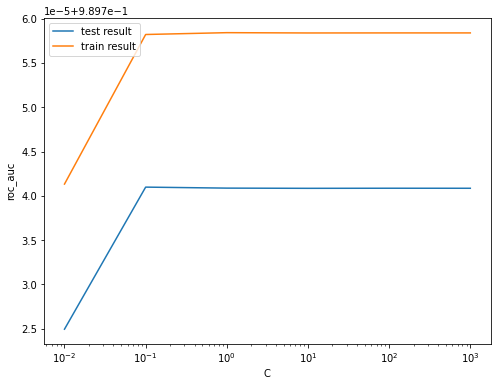

In [295]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [296]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897409900830768 at C = 0.1


#### Logistic regression with optimal C

In [297]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [298]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

##### Prediction on the train set

In [299]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [300]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[221911   5538]
 [ 17693 209756]]


In [301]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [302]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9489314087993352
Sensitivity:- 0.9222111330452102
Specificity:- 0.9756516845534603


In [303]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [304]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

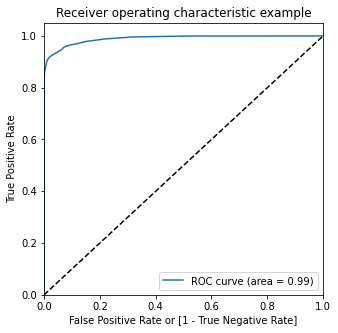

In [305]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

#### Prediction on the test set

In [306]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [307]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55416  1450]
 [   10    86]]


In [308]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [309]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9743688774972789
Sensitivity:- 0.8958333333333334
Specificity:- 0.9745014595716245


In [310]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



##### ROC on the test set

In [311]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

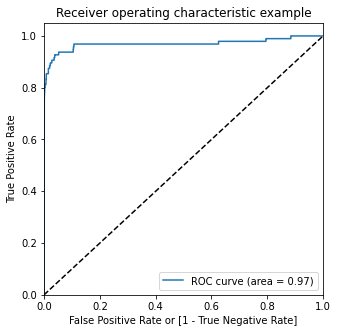

In [312]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.98
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.90
    - Specificity = 0.99
    - ROC = 0.97

# MODEL 13 : XGBoost on balanced data with SMOTE

In [313]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [314]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,65.192900,0.642270,0.721945,0.004236,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999645,0.999753,0.999685,0.999694,0.000045,4,0.999718,0.999736,0.999720,0.999725,0.000008
1,81.704538,0.195680,0.735139,0.009940,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999671,0.999738,0.999652,0.999687,0.000037,5,0.999733,0.999731,0.999697,0.999721,0.000017
2,85.525261,0.089618,0.728828,0.011516,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999665,0.999735,0.999648,0.999683,0.000038,6,0.999720,0.999723,0.999720,0.999721,0.000001
3,63.964741,0.568398,0.742606,0.005214,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999956,0.999950,0.999953,0.999953,0.000002,3,0.999979,0.999972,0.999977,0.999976,0.000003
4,81.055230,0.519467,0.758566,0.016633,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999953,0.999962,0.999959,0.999958,0.000004,2,0.999980,0.999981,0.999984,0.999982,0.000002
5,85.403262,0.703248,0.736821,0.006990,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999970,0.999958,0.999951,0.999960,0.000008,1,0.999985,0.999981,0.999977,0.999981,0.000003


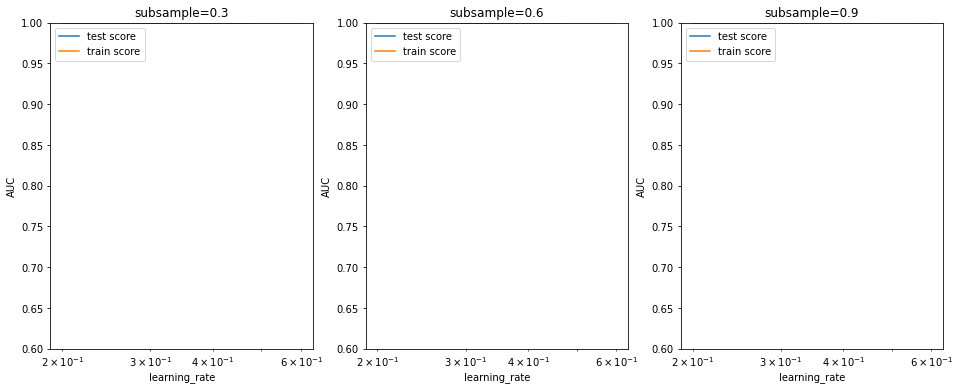

In [315]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [316]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [317]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

##### Prediction on the train set

In [318]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [319]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[225136   2313]
 [  6803 220646]]


In [320]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [321]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9799603427581568
Sensitivity:- 0.970089998197398
Specificity:- 0.9898306873189154


In [322]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    227449
           1       0.99      0.97      0.98    227449

    accuracy                           0.98    454898
   macro avg       0.98      0.98      0.98    454898
weighted avg       0.98      0.98      0.98    454898



In [323]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [324]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9989949029022795

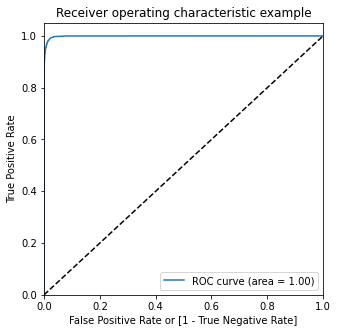

In [325]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##### Prediction on the test set

In [326]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [327]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56208   658]
 [   17    79]]


In [328]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [329]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.988149994733331
Sensitivity:- 0.8229166666666666
Specificity:- 0.9884289382056062


In [330]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.11      0.82      0.19        96

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [331]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [332]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9699007315443324

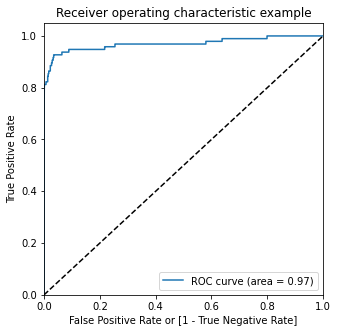

In [333]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.79
    - Specificity = 0.99
    - ROC-AUC = 0.96

Overall, the model is performing well in the test set, what it had learnt from the train set.

# MODEL 14 : Decision Tree on balanced data with SMOTE 

In [334]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [335]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.681515,0.049012,0.050509,0.000900,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986116,0.985690,0.984838,0.985548,0.000531,6
1,6.636310,0.048751,0.049762,0.000116,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986127,0.985690,0.984838,0.985552,0.000535,5
2,6.646443,0.065878,0.049789,0.000382,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986066,0.985642,0.984766,0.985492,0.000541,8
3,6.649970,0.011068,0.050123,0.000717,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986081,0.985641,0.984773,0.985498,0.000543,7
4,12.236750,0.018448,0.056554,0.002561,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998157,0.998119,0.998006,0.998094,0.000064,1
5,12.356474,0.078734,0.054285,0.000662,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998134,0.998155,0.997978,0.998089,0.000079,2
6,12.237898,0.060695,0.055828,0.002903,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998092,0.998090,0.997934,0.998039,0.000074,4
7,12.227795,0.056579,0.054629,0.000502,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998097,0.998059,0.997988,0.998048,0.000045,3


In [336]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.998093970940292
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [337]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

##### Prediction on the train set

In [338]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [339]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[223809   3640]
 [  2374 225075]]


In [340]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [341]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9867794538555896
Sensitivity:- 0.9895624953286232
Specificity:- 0.9839964123825561


In [342]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



In [343]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [344]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9986355757920081

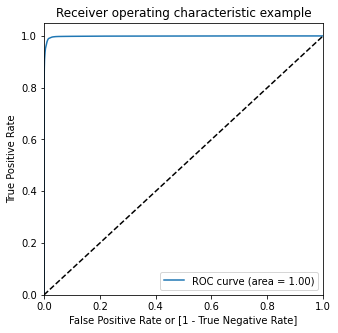

In [345]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##### Prediction on the test set

In [346]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [347]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55852  1014]
 [   19    77]]


In [348]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [349]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9818651030511569
Sensitivity:- 0.8020833333333334
Specificity:- 0.9821686069004326


In [350]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [351]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [352]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8551876157692353

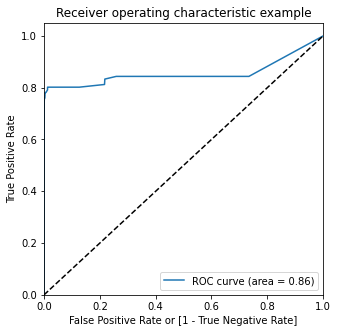

In [353]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.99
    - Specificity = 0.98
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.98
    - Sensitivity = 0.80
    - Specificity = 0.98
    - ROC-AUC = 0.86


In [354]:
# ADASYN (Adaptive Synthetic Sampling) on dataset

In [355]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [356]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [357]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227448})


# MODEL 15 -:  Logistic Regression on balanced data with ADASYN

In [358]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [359]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.025608,0.373553,0.105427,0.032878,0.01,{'C': 0.01},0.963472,0.962327,0.963273,0.963024,0.000499,6,0.962770,0.963211,0.963172,0.963051,0.000199
1,1.988600,0.280188,0.073139,0.000245,0.1,{'C': 0.1},0.963578,0.962435,0.963370,0.963128,0.000497,5,0.962881,0.963305,0.963272,0.963153,0.000192
2,1.880528,0.100077,0.073907,0.001072,1,{'C': 1},0.963585,0.962442,0.963376,0.963134,0.000497,4,0.962890,0.963312,0.963278,0.963160,0.000191
3,1.887939,0.099955,0.073294,0.000610,10,{'C': 10},0.963585,0.962443,0.963377,0.963135,0.000496,3,0.962891,0.963312,0.963279,0.963161,0.000191
4,1.876039,0.084680,0.072114,0.000252,100,{'C': 100},0.963585,0.962443,0.963377,0.963135,0.000496,2,0.962891,0.963312,0.963279,0.963161,0.000191
5,1.897556,0.088534,0.076196,0.004973,1000,{'C': 1000},0.963585,0.962443,0.963377,0.963135,0.000496,1,0.962891,0.963312,0.963279,0.963161,0.000191


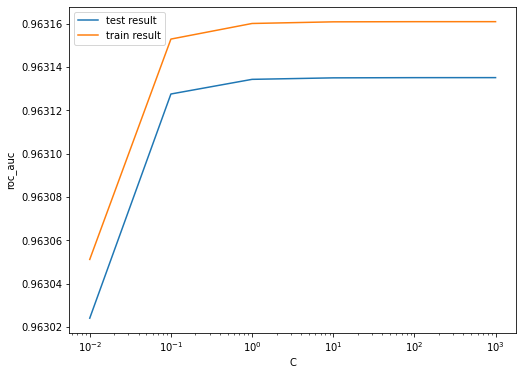

In [360]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [361]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9631351481659101 at C = 1000


#### Logistic regression with optimal C

In [362]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [363]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

##### Prediction on the train set

In [364]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [365]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[207019  20430]
 [ 31286 196162]]


In [366]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [367]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

Accuracy:- 0.8863127257379143
Sensitivity:- 0.862447680348915
Specificity:- 0.9101776662020936
F1-Score:- 0.8835330150436899


In [368]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897



In [369]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [370]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.963161016084171

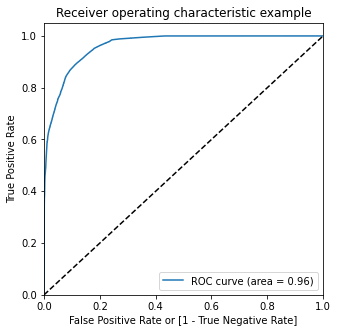

In [371]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Prediction on the test set

In [372]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [373]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[51642  5224]
 [    4    92]]


In [374]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [375]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9082195147642288
Sensitivity:- 0.9583333333333334
Specificity:- 0.9081349136566665


In [376]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [377]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [378]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9671573487086602

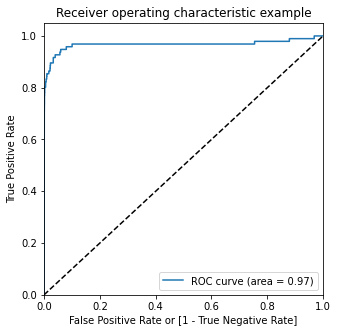

In [379]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.88
    - Sensitivity = 0.86
    - Specificity = 0.91
    - ROC = 0.96
- Test set
    - Accuracy = 0.90
    - Sensitivity = 0.95
    - Specificity = 0.90
    - ROC = 0.97

# MODEL 16 -: Decision Tree on balanced data with ADASYN 

In [380]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [381]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.602510,0.011408,0.050414,0.000884,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.902958,0.920355,0.908615,0.910643,0.007246,8
1,6.580204,0.034476,0.050871,0.001453,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.902958,0.920355,0.909339,0.910884,0.007186,7
2,6.603933,0.054304,0.050338,0.000395,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.902958,0.920316,0.911441,0.911572,0.007087,6
3,6.616067,0.062965,0.052188,0.002968,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.902958,0.920316,0.911441,0.911572,0.007087,5
4,11.734208,0.227323,0.052291,0.000940,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.935240,0.946275,0.935863,0.939126,0.005061,3
5,11.790191,0.155011,0.052724,0.001844,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.933914,0.946330,0.935393,0.938545,0.005537,4
6,11.725563,0.179836,0.051860,0.000200,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.936437,0.945001,0.938473,0.939971,0.003653,2
7,11.727930,0.144127,0.051796,0.000476,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.939195,0.945662,0.940325,0.941727,0.002820,1


In [382]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9417272866682844
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [383]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [384]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [385]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[215929  11520]
 [  1118 226330]]


In [386]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [387]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9722178866864367
Sensitivity:- 0.9950845907636031
Specificity:- 0.9493512831447929


In [388]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227449
           1       0.95      1.00      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



In [389]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [390]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9917591040224101

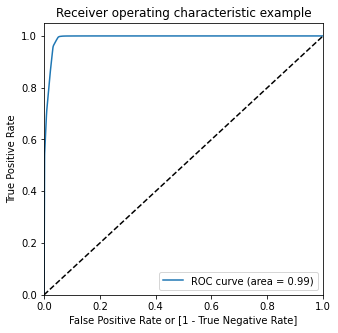

In [391]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Prediction on the test set

In [392]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [393]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[53880  2986]
 [   15    81]]


In [394]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [395]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9473157543625575
Sensitivity:- 0.84375
Specificity:- 0.9474905919178419


In [396]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [397]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [398]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9141440147305362

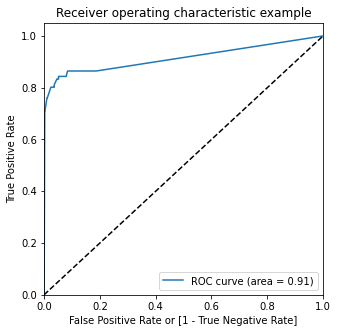

In [399]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.97
    - Sensitivity = 0.99
    - Specificity = 0.95
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.95
    - Sensitivity = 0.84
    - Specificity = 0.95
    - ROC-AUC = 0.91

# MODEL 17 -: XGBoost on balanced data with XGBoost

In [400]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [401]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,62.245408,0.419667,0.724384,0.008267,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.975756,0.996202,0.995163,0.989040,0.009403,4,0.999304,0.999014,0.999286,0.999201,0.000133
1,79.342420,0.104169,0.730034,0.013650,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978500,0.996075,0.993204,0.989260,0.007698,3,0.999295,0.999072,0.999224,0.999197,0.000093
2,83.374716,0.244763,0.731865,0.013339,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.977110,0.996104,0.993729,0.988981,0.008450,5,0.999300,0.999069,0.999194,0.999188,0.000095
3,62.067089,0.817050,0.743340,0.020099,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.979174,0.998146,0.998146,0.991822,0.008944,1,0.999937,0.999934,0.999942,0.999938,0.000004
4,79.141636,0.055795,0.720395,0.005767,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.971403,0.996825,0.997548,0.988592,0.012158,6,0.999950,0.999942,0.999947,0.999946,0.000003
5,83.871754,0.828264,0.719788,0.008915,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.977356,0.998183,0.995571,0.990370,0.009264,2,0.999953,0.999935,0.999955,0.999948,0.000009


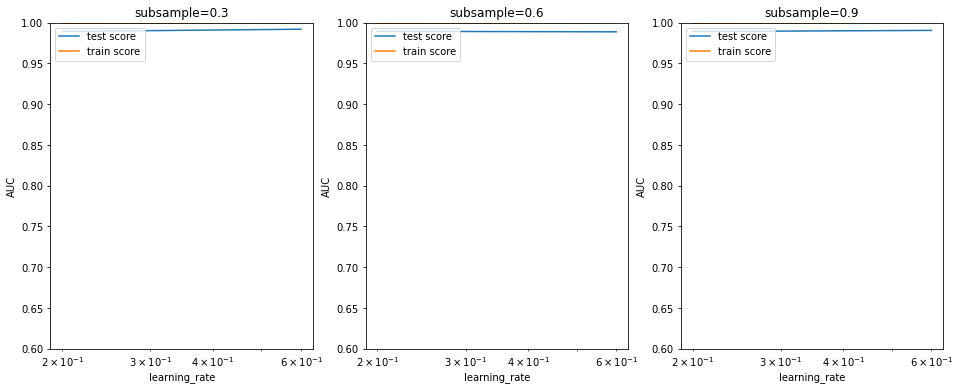

In [402]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [403]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [404]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3})

##### Prediction on the train set

In [405]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [406]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[227449      0]
 [     0 227448]]


In [407]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [408]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9785467919111359
Sensitivity:- 1.0
Specificity:- 1.0


In [409]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    227449
           1       0.97      0.99      0.98    227448

    accuracy                           0.98    454897
   macro avg       0.98      0.98      0.98    454897
weighted avg       0.98      0.98      0.98    454897



In [410]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [411]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9970449095941256

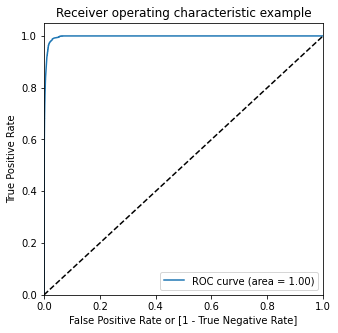

In [412]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Prediction on the test set

In [413]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [414]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54863  2003]
 [   11    85]]


In [415]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [416]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9646430953969313
Sensitivity:- 0.8854166666666666
Specificity:- 0.964776843808251


In [417]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.04      0.89      0.08        96

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [418]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [419]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9658537541471764

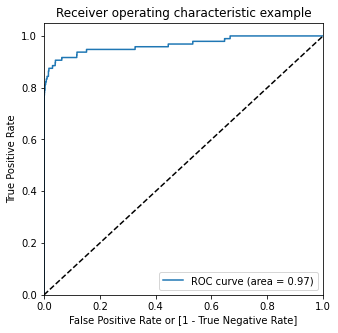

In [420]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.78
    - Specificity = 0.99
    - ROC-AUC = 0.96

### Choosing best model on the balanced data

He we balanced the data with various approach such as Undersampling, Oversampling, SMOTE and Adasy. With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. But we should be interested in the best model. 

Though the Undersampling technique models performed well, we should keep mind that by doing the undersampling some imformation were lost. Hence, it is better not to consider the undersampling models.

Whereas the SMOTE and Adasyn models performed well. Among those models the simplist model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set. We can consider the Logistic model as the best model to choose because of the easy interpretation of the models and also the resourse requirements to build the mdoel is lesser than the other heavy models such as Random forest or XGBoost.

Hence, we can conclude that the `Logistic regression model with SMOTE` is the best model for its simlicity and less resource requirement. 

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [421]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9897539730388945
Threshold= 0.5311563618970118


We can see that the threshold is 0.53, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## Cost benefit analysis
We have tried several models till now with both balanced and imbalanced data. We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.

But while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not. For the models such as Random forest, SVM, XGBoost we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss of gain the bank incur. If the amount if huge then we have to consider building the complex model even though the cost of building the model is high. 

## Summary to the business
For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

After performing several models, we have seen that in the balanced dataset with SMOTE technique the simplest Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model here. It is also easier to interpret and explain to the business.